# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [40]:
file_path = ('databeats-household-power-consumption\databeats-household-power-consumption\household_power_consumption\household_power_consumption.csv')

In [138]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats      # import scipy.stats and rename it
from matplotlib import pyplot
from ipywidgets import interact, fixed
import ipywidgets as widgets
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [42]:
df=pd.read_csv('databeats-household-power-consumption\databeats-household-power-consumption\household_power_consumption\household_power_consumption.csv', sep=',')

In [43]:
df.isnull()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
260635,False,False,False,False,False,False,False,False,False
260636,False,False,False,False,False,False,False,False,False
260637,False,False,False,False,False,False,False,False,False
260638,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum(axis=0) # count the missing values in each column

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [45]:
df_nonans= df.dropna() # returns the dataset minus all NaNs
df_nonans

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...
260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [46]:
#df.replace(-200.0, data_float.median(), inplace=True) # replace missing numbers with medians

In [47]:
# to ensure no columns with ? remain
da = df_nonans[df_nonans.Date != '?']
db = da[da.Time != '?']
dc = db[db.Global_active_power != '?']
dd = dc[dc.Global_reactive_power != '?']
de = dd[dd.Voltage != '?']
dg = de[de.Global_intensity != '?']
dh = dg[dg.Sub_metering_1 != "?"]
di = dh[dh.Sub_metering_2 != '?']
dj = di[di.Sub_metering_3 != "?"]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [48]:
dj.shape

(256869, 9)

In [49]:
data_dateless=dj.drop(['Date','Time'], axis=1) # removes date & time which can't be converted to floats
data_dateless

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.58,0.136,241.97,10.6,0,0,0.0
1,2.552,0.1,241.75,10.4,0,0,0.0
2,2.55,0.1,241.64,10.4,0,0,0.0
3,2.55,0.1,241.71,10.4,0,0,0.0
4,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...
260635,2.88,0.36,239.01,12,0,0,18.0
260636,2.892,0.358,238.86,12.2,0,0,17.0
260637,2.882,0.28,239.05,12,0,0,18.0
260638,2.66,0.29,238.98,11.2,0,0,18.0


In [50]:
data_float=data_dateless.astype(float) # transforms remaining data to floats
data_float

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
260635,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,2.660,0.290,238.98,11.2,0.0,0.0,18.0


Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [51]:
data_float.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [52]:
data_float.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


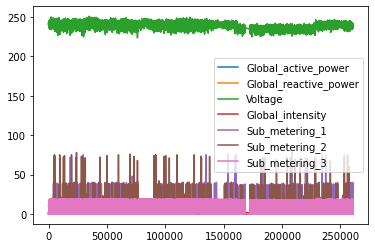

In [53]:
data_float.plot()

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [54]:
df1000=data_float.loc[0:999, :]
df1000

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,1.354,0.130,239.72,5.6,0.0,0.0,17.0
996,1.366,0.136,240.95,5.6,0.0,0.0,18.0
997,1.368,0.138,241.16,5.6,0.0,0.0,18.0
998,1.372,0.140,241.61,5.6,0.0,0.0,18.0


In [55]:
df1000.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [56]:
df75000=data_float.loc[74999:75998, :]
df75000

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
74999,2.248,0.052,238.30,9.4,0.0,0.0,0.0
75000,2.258,0.052,238.85,9.4,0.0,0.0,0.0
75001,2.280,0.048,240.13,9.4,0.0,0.0,0.0
75002,2.286,0.046,240.42,9.4,0.0,0.0,0.0
75003,2.284,0.048,240.33,9.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
75994,1.248,0.100,235.26,5.2,0.0,0.0,0.0
75995,1.322,0.096,234.73,5.6,0.0,0.0,0.0
75996,1.562,0.092,233.84,6.6,0.0,0.0,0.0
75997,1.786,0.102,234.82,7.6,0.0,0.0,0.0


In [57]:
df75000.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.817010,0.086088,239.827460,7.572600,0.0,0.249000,6.926000
std,1.172552,0.074981,2.083603,4.927707,0.0,0.552543,8.534833
min,0.252000,0.000000,233.840000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.480000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.755000,6.400000,0.0,0.000000,0.000000
75%,2.384000,0.114000,241.402500,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.970000,35.000000,0.0,2.000000,18.000000


In [58]:
print (df1000.describe(include = 'all'))
print (df75000.describe(include = 'all'))
#The two samples give very different means and other indicators. The first 1000 rows will not give a good picture of the whole dataset. 
#The mean for df1000 is 3.16 and the mean for df75000 is 6.92. The std dev for df1000 is 6.73 and the std dev for df75000 is 8.53. They do not match and do not refclect the statistics for the dataset as a whole. 


       Global_active_power  Global_reactive_power      Voltage  \
count          1000.000000            1000.000000  1000.000000   
mean              2.384750               0.101824   240.421420   
std               0.573988               0.091648     2.011932   
min               0.204000               0.000000   235.300000   
25%               2.420000               0.000000   238.790000   
50%               2.512000               0.114000   240.560000   
75%               2.602000               0.138000   241.910000   
max               3.558000               0.454000   245.070000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count       1000.000000          1000.0     1000.000000     1000.000000  
mean           9.874600             0.0        0.246000        3.161000  
std            2.345493             0.0        0.545694        6.738582  
min            0.800000             0.0        0.000000        0.000000  
25%            9.800000            

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [59]:
df_first=data_float.loc[0:9999, :]
df_first

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9995,1.728,0.000,241.81,7.2,0.0,0.0,18.0
9996,1.720,0.000,242.65,7.0,0.0,0.0,18.0
9997,1.738,0.000,242.62,7.2,0.0,0.0,18.0
9998,1.686,0.000,242.38,7.0,0.0,0.0,18.0


In [60]:
df_first.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.483666,0.133779,240.906520,6.26116,0.585700,1.752500,5.274900
std,1.194093,0.112438,3.350382,5.00432,4.424049,7.661091,8.026118
min,0.204000,0.000000,226.320000,0.80000,0.000000,0.000000,0.000000
25%,0.394000,0.048000,238.640000,1.80000,0.000000,0.000000,0.000000
50%,1.372000,0.134000,241.110000,5.80000,0.000000,0.000000,0.000000
75%,2.378000,0.188000,243.210000,9.80000,0.000000,0.000000,17.000000
max,8.044000,0.862000,250.020000,35.60000,39.000000,75.000000,19.000000


In [61]:
df_small= data_float.sample(n = 10000) 
df_small

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
67967,0.398,0.230,239.34,1.8,0.0,0.0,0.0
77561,0.232,0.000,238.40,1.0,0.0,0.0,0.0
130819,1.544,0.000,237.67,6.4,0.0,0.0,17.0
32864,4.538,0.000,238.45,19.0,0.0,0.0,0.0
253848,0.120,0.000,240.89,0.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...
59176,2.398,0.108,238.97,10.0,0.0,0.0,0.0
5925,2.424,0.158,242.47,10.0,0.0,0.0,0.0
235952,1.888,0.362,241.59,8.4,0.0,0.0,0.0
255239,0.320,0.242,241.31,1.6,0.0,1.0,0.0


In [62]:
df_small.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.138102,0.122457,239.219317,4.865540,1.297100,1.569600,5.694500
std,1.155170,0.111824,3.614674,4.890959,6.628365,6.391826,8.138316
min,0.084000,0.000000,224.970000,0.400000,0.000000,0.000000,0.000000
25%,0.294000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.534000,0.104000,239.640000,2.400000,0.000000,0.000000,0.000000
75%,1.580000,0.192000,241.850000,6.600000,0.000000,1.000000,17.000000
max,9.116000,0.854000,249.370000,40.200000,75.000000,74.000000,19.000000


In [63]:
print (df_first.describe(include = 'all'))
print (df_small.describe(include = 'all'))
print (data_float.describe(include = 'all'))

# Yes. These datasets df_first and df_small are better representations of the whole. Their indicators are equal or very close to each other, as illustrate below from the describe function

       Global_active_power  Global_reactive_power       Voltage  \
count         10000.000000           10000.000000  10000.000000   
mean              1.483666               0.133779    240.906520   
std               1.194093               0.112438      3.350382   
min               0.204000               0.000000    226.320000   
25%               0.394000               0.048000    238.640000   
50%               1.372000               0.134000    241.110000   
75%               2.378000               0.188000    243.210000   
max               8.044000               0.862000    250.020000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count       10000.00000    10000.000000    10000.000000    10000.000000  
mean            6.26116        0.585700        1.752500        5.274900  
std             5.00432        4.424049        7.661091        8.026118  
min             0.80000        0.000000        0.000000        0.000000  
25%             1.80000   

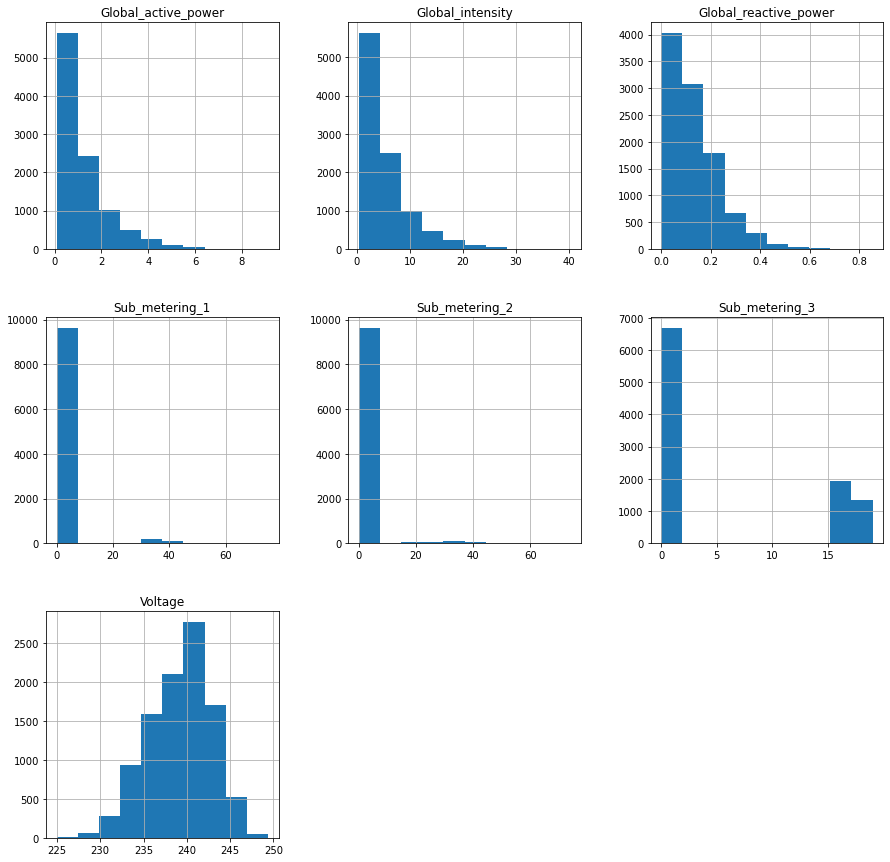

In [64]:
pd.DataFrame.hist(df_small, figsize = [15,15]); # see histogram summary

## Task 3: Correlation and Plotting

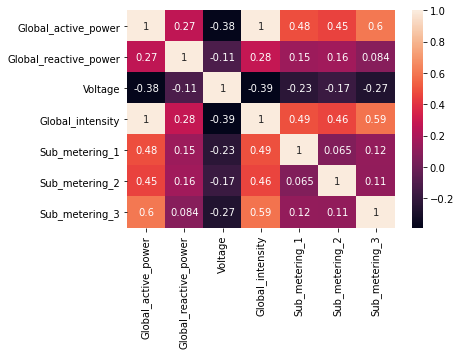

In [65]:
sns.heatmap(df_small.corr(), annot=True)

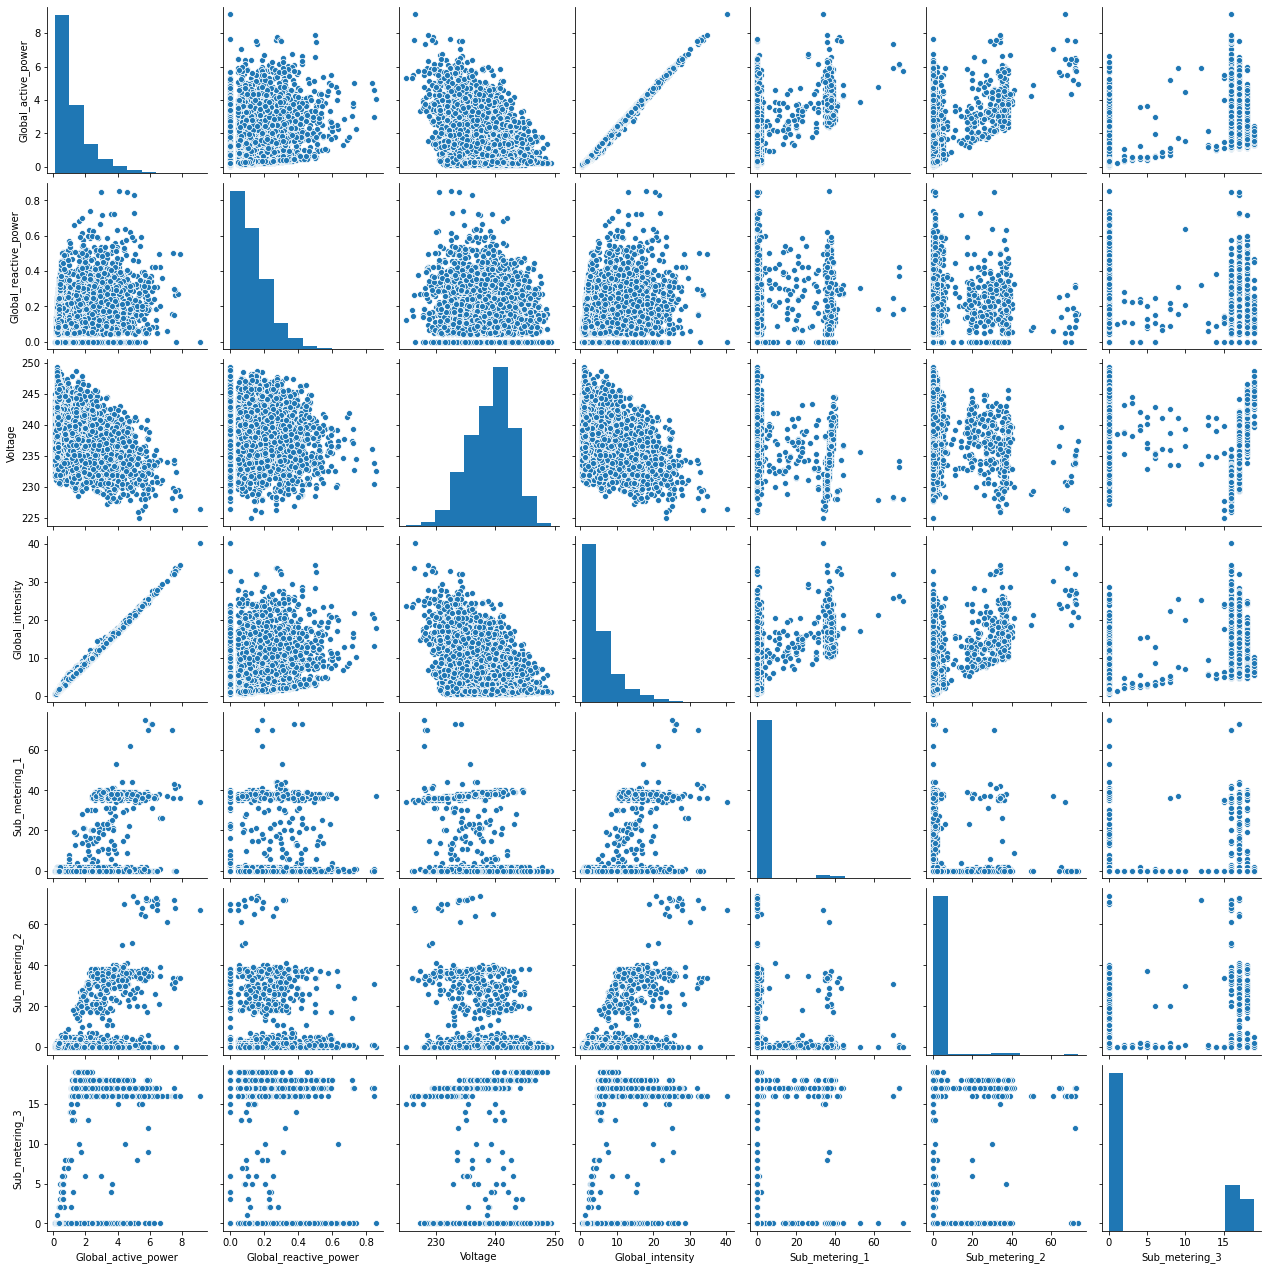

In [66]:
sns.pairplot(df_small)

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

From the heatmap above we can see the variables with the highest correlation are Global_active_power and Global_intensity. Global_active_power and Global_intensity both have a significant positive correlation to Sub_metering_3

Additionally, voltage has a significant correlation with  Global_active_power, Global_intensity. Global_active_power and Sub_metering_3

The pairplot does not show high correlation between any variables other than Global_active_power and Global_intensity. We use the pearson and spearman coefficients to determine other correlations


In [72]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset

print ("As a rule of thumb, for absolute value of r: 0.00-0.19: very weak, 0.20-0.39: weak, 0.40-0.59: moderate, 0.60-0.79: strong, 0.80-1.00: very strong. You should keep in mind that these classes are arbitrary and they may differ for different context. \n \n It looks like there is a moderate to strong relationship between Global_active_power and Submetering_1, Submetering_2 and Submetering_3 as well as Global_intensity and Submetering_1, Submetering_1 and Submetering_1")
print ('\n')

r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_3'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_active_power and Sub_metering_3")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_2'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_active_power and Sub_metering_2")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_1'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_active_power and Sub_metering_1")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Voltage'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_active_power and Voltage")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_active_power'], df_small['Global_reactive_power'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_active_power and Global_reactive_power")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_reactive_power'], df_small['Voltage'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_reactive_power and Voltage")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_reactive_power'], df_small['Global_intensity'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_reactive_power and Global_intensity")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_reactive_power'], df_small['Sub_metering_1'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_reactive_power and Sub_metering_1")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_reactive_power'], df_small['Sub_metering_2'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_reactive_power and Sub_metering_2")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_reactive_power'], df_small['Sub_metering_3'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_reactive_power and Sub_metering_3")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Voltage'], df_small['Global_intensity'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Voltage and Global_intensity")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Voltage'], df_small['Sub_metering_1'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Voltage and Sub_metering_1")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Voltage'], df_small['Sub_metering_2'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Voltage and Sub_metering_2")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Voltage'], df_small['Sub_metering_3'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Voltage and Sub_metering_3")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_intensity'], df_small['Sub_metering_1'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_intensity and Sub_metering_1")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_intensity'], df_small['Sub_metering_2'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_intensity and Sub_metering_2")
print(r)
print(p)
print ('\n')


r, p = stats.pearsonr(df_small['Global_intensity'], df_small['Sub_metering_3'])
print ("Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p \n between Global_intensity and Sub_metering_3")
print(r)
print(p)
print ('\n') 

As a rule of thumb, for absolute value of r: 0.00-0.19: very weak, 0.20-0.39: weak, 0.40-0.59: moderate, 0.60-0.79: strong, 0.80-1.00: very strong. You should keep in mind that these classes are arbitrary and they may differ for different context. 
 
 It looks like there is a moderate to strong relationship between Global_active_power and Submetering_1, Submetering_2 and Submetering_3 as well as Global_intensity and Submetering_1, Submetering_1 and Submetering_1


Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p 
 between Global_active_power and Sub_metering_3
0.6041004193768942
0.0


Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p 
 between Global_active_power and Sub_metering_2
0.45349908165083314
0.0


Pearson correlation coefficient r and probability of observing a correlation that extreme in the dataset p 
 between Global_active_power and Sub_metering_1
0.4841988219

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [75]:
df_small.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
67967,0.398,0.23,239.34,1.8,0.0,0.0,0.0
77561,0.232,0.00,238.40,1.0,0.0,0.0,0.0
130819,1.544,0.00,237.67,6.4,0.0,0.0,17.0
32864,4.538,0.00,238.45,19.0,0.0,0.0,0.0
253848,0.120,0.00,240.89,0.6,0.0,0.0,0.0


In [76]:
array = df_small.values # get data values

In [79]:
# Build a simple model and find parameters, as well as the R-Squared Value
# some data to plot
xvals = array[:,3] # split data into input features (independent variables)
xvals

array([1.8, 1. , 6.4, ..., 8.4, 1.6, 1.8])

In [80]:
yvals = array[:,0] # this is the prediction feature
yvals

array([0.398, 0.232, 1.544, ..., 1.888, 0.32 , 0.38 ])

In [92]:
# show the points (x[] and y[]) and the line of best fit determined by y = mx + c, where 
# m is the gradient and c in the intercept (y value when x=0, or where the line crosses the y axis)
def plot_line(x, y, m, c):
    # The points
    plt.scatter(x, y,  c="g", alpha=0.5,label="Points")
    #The Line
    plt.plot(x, [m*x +c for x in x])
    # Labels etc
    plt.xlabel("X Global_intensity (Explanatory Variable)")
    plt.ylabel("Y Global_active_power (Dependant Variable)")
    plt.legend(loc=2)
    plt.ylim([0, 10])    

In [93]:
#Instead of calling our function plot_line() directly, we can use the following code to make it interactive. You do not need to know to do this, but it's a useful trick
from ipywidgets import interact, fixed
import ipywidgets as widgets
interact(plot_line, x=fixed(xvals),y =fixed(yvals), m=(-5.0, 5.0), c=(0, 150.0));

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0), FloatSlider(value=75.0, desc…

In [97]:
# Finding Line of best fit with Scikit-learn software
# The data
ACTIVE_POWER =  array[:,0]
REACTIVE_POWER =  array[:,1]
VOLTAGE =  array[:,2]
GLOBAL_INTENSITY =  array[:,3]
SUBMETERING1 =  array[:,4]
SUBMETERING2 =  array[:,5]
SUBMETERING3 =  array[:,6]

In [98]:
# import model from Scikit-learn's sklearn library
from sklearn import linear_model

# initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

In [101]:
# 𝑋  must be an array of arrays, with each array containing one or more input variables. 
# So in our case, we want 𝑋 to look like [[c0], [c1], [c2], [c3]...] where cN are the elements of CRUDE.
# Below are two ways to turn CRUDE into an array of arrays.

# with the reshape function
INPUT = np.array(GLOBAL_INTENSITY).reshape(-1, 1)

In [100]:
# or using list comprehension
# INPUT = [[c] for c in CRUDE]

In [102]:
# Now we can actually fit the data to the model - calculating model parameters based on  𝑋  and  𝑌

lr1.fit(X = INPUT,y = ACTIVE_POWER)

# We can extract the model parameters:
print ("Intercept: ", lr1.intercept_)
print ("Coefficient: ",lr1.coef_)

Intercept:  -0.00978609608642067
Coefficient:  [0.23592212]


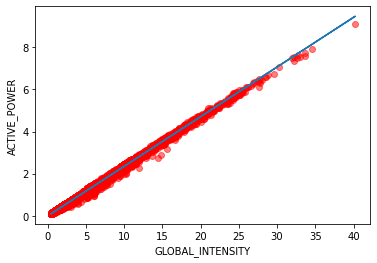

In [103]:
# Finally, we can plot both the input data and the line of best fit as determined by the model. Original data as scatter plot:

plt.scatter(GLOBAL_INTENSITY, ACTIVE_POWER,  c="r", alpha=0.5,label="Global intensity")
# line of best fit. NB, doing this manually based on the parameters
plt.plot(GLOBAL_INTENSITY, [lr1.coef_*x +lr1.intercept_ for x in GLOBAL_INTENSITY]) # We could also use lr1.predict(x), as in next example
plt.xlabel("GLOBAL_INTENSITY")
plt.ylabel("ACTIVE_POWER");

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

In [104]:
#multiple regression

df_small.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
67967,0.398,0.23,239.34,1.8,0.0,0.0,0.0
77561,0.232,0.00,238.40,1.0,0.0,0.0,0.0
130819,1.544,0.00,237.67,6.4,0.0,0.0,17.0
32864,4.538,0.00,238.45,19.0,0.0,0.0,0.0
253848,0.120,0.00,240.89,0.6,0.0,0.0,0.0


In [122]:
# initialize and train the model as we did before
lr2 = linear_model.LinearRegression()
lr2.fit(X = np.array(VOLTAGE).reshape(-1, 1),y = ACTIVE_POWER)

LinearRegression()

In [123]:
# intercept + coef
print("Intercept: ", lr2.intercept_)
print("Coef",lr2.coef_)

Intercept:  30.149701507435324
Coef [-0.12127616]


ValueError: Expected 2D array, got scalar array instead:
array=239.34.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

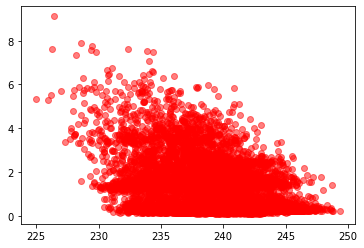

In [127]:
# plot
plt.scatter(VOLTAGE, ACTIVE_POWER,  c="r", alpha=0.5,label="")
plt.plot(VOLTAGE, [lr2.predict(x) for x in VOLTAGE]) # Note - much easier than doing it manually
plt.xlabel("VOLTAGE")
plt.ylabel("ACTIVE_POWER")

# scaling the Y axis for clarity 
plt.ylim([0, 20]) 

In [128]:
# Now we'll build a model that uses both  GLOBAL_INTENSITY  and  VOLTAGE  as inputs.
INPUT = [[GLOBAL_INTENSITY[i], VOLTAGE[i]] for i in range(len(GLOBAL_INTENSITY))]

In [129]:
print(INPUT)

[[1.8, 239.34], [1.0, 238.4], [6.4, 237.67], [19.0, 238.45], [0.6, 240.89], [2.0, 239.11], [1.2, 234.19], [5.4, 243.51], [2.4, 244.84], [1.2, 242.28], [9.6, 241.91], [1.4, 240.41], [9.4, 240.22], [2.0, 237.52], [2.0, 243.25], [0.8, 238.56], [1.4, 241.92], [1.0, 243.18], [1.0, 235.82], [1.6, 236.38], [11.4, 237.13], [9.8, 240.76], [8.4, 233.41], [1.4, 236.69], [1.2, 240.28], [14.0, 240.21], [6.0, 236.53], [0.8, 238.6], [1.4, 239.14], [12.6, 238.11], [1.8, 240.57], [5.2, 240.62], [5.4, 238.25], [1.6, 244.1], [1.0, 246.93], [2.4, 244.73], [5.0, 241.36], [0.6, 237.64], [6.2, 231.62], [1.2, 235.96], [4.4, 236.81], [6.8, 241.16], [1.0, 244.08], [1.6, 244.77], [1.2, 237.84], [6.6, 236.25], [14.2, 233.19], [9.0, 237.2], [5.2, 236.01], [1.2, 243.09], [5.8, 243.06], [1.0, 244.95], [0.8, 234.57], [0.8, 239.61], [4.8, 239.68], [4.8, 243.75], [1.8, 237.57], [1.4, 233.36], [2.6, 242.11], [16.4, 239.43], [5.8, 242.57], [6.2, 244.47], [1.4, 240.86], [6.0, 242.09], [0.8, 237.34], [1.4, 239.54], [7.4, 2

In [130]:
mlr1 = linear_model.LinearRegression()
mlr1.fit(X = INPUT,y = ACTIVE_POWER)

# intercept + coef
print("Intercept: ", mlr1.intercept_)
print("Coef",mlr1.coef_)

Intercept:  -0.9847122863035853
Coef [0.23709192 0.00405166]


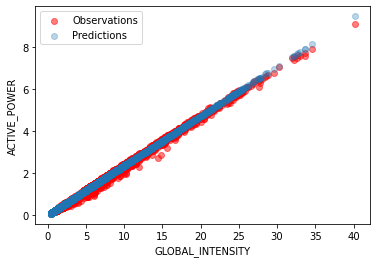

In [132]:
plt.scatter(GLOBAL_INTENSITY, ACTIVE_POWER,  c="r", alpha=0.5,label="Observations") # Actual values
plt.scatter(GLOBAL_INTENSITY, [mlr1.predict([x]) for x in INPUT], alpha=0.3, label="Predictions"); # Predicted values
plt.xlabel('GLOBAL_INTENSITY')
plt.ylabel('ACTIVE_POWER')
plt.legend()

In [133]:
INPUT = [[c] for c in GLOBAL_INTENSITY]
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = ACTIVE_POWER)
print ('Simple regression model score\t', slr.score(INPUT, ACTIVE_POWER))

INPUT = [[GLOBAL_INTENSITY[i], VOLTAGE[i]] for i in range(len(GLOBAL_INTENSITY))]
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = ACTIVE_POWER);
print ('Multiple regression model score\t', mlr.score(INPUT, ACTIVE_POWER))

Simple regression model score	 0.9977762188409269
Multiple regression model score	 0.9979124227181586


### Answer:

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

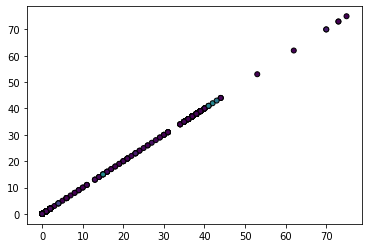

In [144]:
plt.scatter(SUBMETERING1, SUBMETERING1, marker='o', c=SUBMETERING2,
            s=25, edgecolor='k')

In [146]:
INPUT = np.array(SUBMETERING1).reshape(-1, 1)

In [147]:
#Model using logistic regression
model = linear_model.LogisticRegression()
model.fit(SUBMETERING1, SUBMETERING2)

# We can use this to predict which class a given point falls into. It get's most right
print(model.predict([SUBMETERING1[5]]), SUBMETERING2[5])
print(model.predict([SUBMETERING1[6]]), SUBMETERING2[6])

# Modelshave a score method, but it's different depending on the type of model. In the case of logistic regression
# the score is the mean accuracy - how often it gets it right
print("Score: ", model.score(SUBMETERING1, SUBMETERING2))

# Notice, X has two features, each contributing, so we'redoing multiple linear regression.
# We could build a model based on just one of these explanatory vars. Notice, they performs slightly worse:
model = linear_model.LogisticRegression()
model.fit(SUBMETERING1[:,0].reshape(-1, 1), SUBMETERING2)
print("Score (one var): ", model.score(SUBMETERING1[:,0].reshape(-1, 1), SUBMETERING2))

model = linear_model.LogisticRegression()
model.fit(SUBMETERING1[:,1].reshape(-1, 1), Y1)
print("Score (the other var): ", model.score(X1[:,1].reshape(-1, 1), SUBMETERING2))



ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ? (Answered above)

<BarContainer object of 10000 artists>

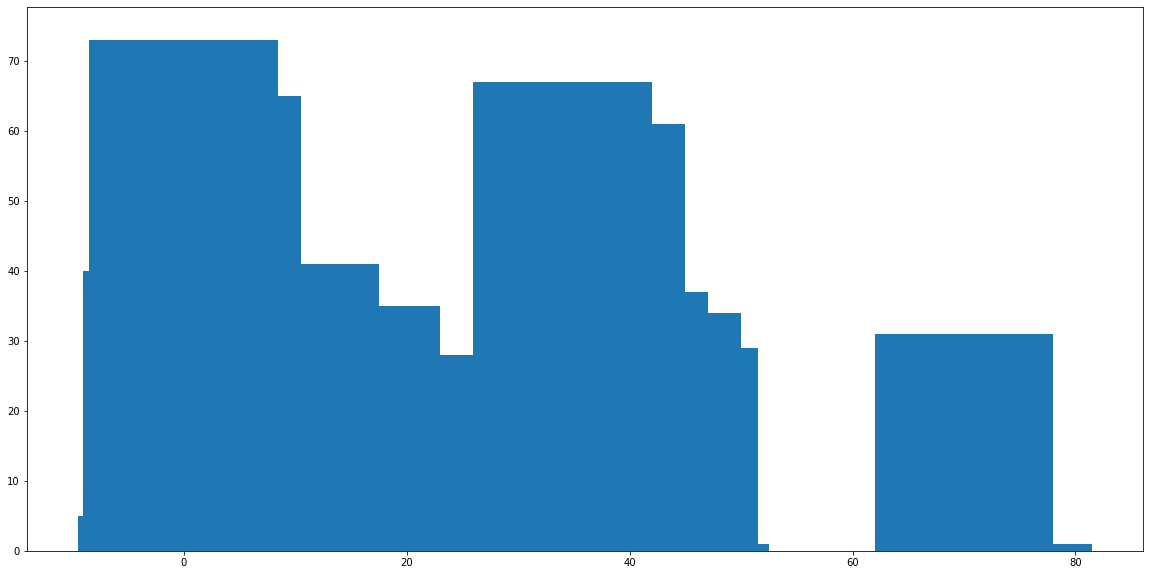

In [136]:
pyplot.figure(figsize=(20,10))               # set size of plot figure
pyplot.bar(df_small['Sub_metering_1'], df_small['Sub_metering_2'], df_small['Sub_metering_3']) 